# K MEANS ASSIGNMENT
<hr style="height:5px;border-width:2;color:gray">

<div class = "alert alert-block alert-info">
<b><u>Note</u></b>:<br>
Since we are nearing the end of this course, this assignment is mostly unguided. This is done so for two reasons:<br>
    <ol>
        <li>This is a relatively easier algorithm to implement.</li>
        <li>This will also help you gear up for the final task we have in store for you &#x1F609;.</li>
    </ol>
</div>

In this Assignment you will be implementing K Means from scratch on your own. If you have gone through the theory material, you will have implemented K Means using scikit learn. However to get a better understanding of what is actually happening behind the scenes, you will be implementing K Means from scratch.

#### Dataset
You are given a file "data.npy" along with this assignment notebook. Load the numpy array from that file and cluster on that data.

#### Tasks
<ul>
    <li>
        <b>Creating Functions</b>:<br>
        You are expected to create the following functions.
        <ul>
            <li>Model function that implements K Means given K value and data. It should return the cluster centers.</li>
            <li>Error function that calculates the SSE given cluster centers and data. It should return SSE value.</li>
            <li>Function to plot Elbow plot given maximum number of K values and data.</li>
        </ul>
        Apart from these you can create as many helper funtions as you want but these three functions must be defined.
    </li>
    <li>
        <b>Clustering</b>:<br>
        Here you are expected to perform K Means clustering on the given data using the suitable K Value and then give suitable cluster centers.
    </li>
</ul>

#### Evaluation
In this Assignment you will be scored solely on the correctness and efficiency of your implementation.

#### Important note
<b>You are not allowed to use any library other than numpy and matplotlib (You can use seaborn instead of matplotlib if you wish to do so).</b>

You can find many implementations of K Means from scratch online but please refrain from looking into those and try implementing on your own just using the theory that you know.

Now that you have read all this, Code on!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.load('data.npy')
data

array([[6.5, 3. , 5.8, 2.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3. , 5. , 1.7],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.7, 4.9, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.2, 3. , 5.8, 1.6],
       [6.1, 2.8, 4. , 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.6, 3.4, 1.4, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.5, 2.8, 4.6, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3.8, 1.7, 0.3],
       [5.7, 2.5, 5. , 2. ],
       [6.7, 3.1, 4.4, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [5.1, 2.5, 3. , 1.1],
       [5.2, 4.1, 1.5, 0.1],
       [5. , 2.3, 3.3, 1. ],
       [6.7, 3.1, 4.7, 1.5],
       [5.6, 2.7, 4.2, 1.3],
       [6.1, 2.9, 4.7, 1.4],
       [5. , 3.6, 1.4, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3.9, 1.7, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [4.6, 3

In [3]:
data.shape

(150, 4)

In [4]:
class KMeans:
    def __init__(self,k,data,n_iter):
        self.data = data
        self.k = k
        self.centroids = np.array([]).reshape(self.data.shape[1],0)
        self.Output = {}
        self.m,self.n = data.shape
        self.n_iter = n_iter
        pass
    
    def fit(self):
        idx = np.random.randint(self.m-1,size=self.k)
        self.centroids = self.data[idx,:]
        self.centroids = self.centroids.T
        
        for i in range(self.n_iter):
            euclidian_distance = np.array([]).reshape(self.m,0)
            for k in range(self.k):
                tempdist = np.sum((self.data-self.centroids[:,k])**2,axis=1)
                euclidian_distance = np.c_[euclidian_distance,tempdist]
                pass
            clusters=np.argmin(euclidian_distance,axis=1)+1
    
            new_centroids={}
            for k in range(self.k):
                new_centroids[k+1]=np.array([]).reshape(4,0)
                pass
            
            for i in range(self.m):
                new_centroids[clusters[i]]=np.c_[new_centroids[clusters[i]],self.data[i]]
                pass
            
            for k in range(self.k):
                new_centroids[k+1] = new_centroids[k+1].T
                pass
            
            for k in range(self.k):
                self.centroids[:,k] = np.mean(new_centroids[k+1],axis=0)
                pass
            pass
        
        self.output = new_centroids
        pass
    
    def predict(self):
        return self.output, self.centroids.T
        pass
    
    def SSE(self):
        
        sse = 0
        for k in range(self.k):
            sse += np.sum((self.output[k+1]-self.centroids[:,k])**2)
            pass
        
        return sse
        pass

In [5]:
def plot_sse(SSE_array,x):
    plt.plot(np.arange(1,x,1),SSE_array)
    plt.xlabel('Number of clusters')
    plt.ylabel("SSE values")
    plt.title("Elbo method for calculating number of clusters")
    plt.show()
    pass

In [14]:
SSE_array = np.array([])
x = 11
for c in range(1,x):
    kmeans = KMeans(c,data,100)
    kmeans.fit()
    output,centroids = kmeans.predict()
    
    sse = 0
    for c in range(c):
        sse += np.sum((output[c+1]-centroids[c,:])**2)
        pass
    
    SSE_array = np.append(SSE_array,sse)
    pass        

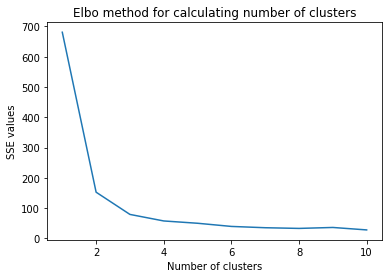

In [15]:
plot_sse(SSE_array,x)

As it can be seen from the above graph that the optimal number of clusters can be either 2 or 3.

Sometimes there will be a huge spike in between, it is advised to ignore it. It comes when there is a mean of an empty slice.

Running the algorithm over a 300 iterations as the initial cluster points taken are random.

In [20]:
# Chossing k=2
kmeans_2 = KMeans(2,data,300)
kmeans_2.fit()
_, centroids_2 = kmeans_2.predict()
centroids_2

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [27]:
# Chossing k = 3

kmeans_3 = KMeans(3,data,300)
kmeans_3.fit()
_, centroids_3 = kmeans_3.predict()
centroids_3

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.418     , 1.464     , 0.244     ]])